In [1]:
#import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
#Read image from CelebA data set and corresponding atrributes
img=cv2.imread(r'D:\imagematting\img_align_celeba\011200.jpg')
cv2.imshow("image",img)
cv2.waitKey()

data=pd.read_csv(r'D:\imagematting\real.txt',header=None)
ino=11200-1

In [3]:
#Obtain the  Colour features of the image
b,g,r = cv2.split(img)
R=r-(g+b)/2
G=g-(r+b)/2
B=b-(r+g)/2

In [4]:
#Get the grayscale image
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey()

-1

In [5]:
#Reshape the matrices using for loop(can also use the np.reshape(), which is much easier)
k=0
l=0
red=np.zeros(218*178)
blue=np.zeros(218*178)
green=np.zeros(218*178)
gray2=np.zeros(218*178)
for i in range(218):
  for j in range(178): 
    red[k]=R[i,j]
    blue[k]=B[i,j]
    green[k]=G[i,j]
    gray2[k]=gray[i,j]
    k=k+1

In [6]:
#Get the training data read 
X=[red,green,blue,gray2]
X=np.transpose(X)
#Apply K means clustering to the training data
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,n_init=10)
kmeans.fit(X)
#Reshape the labels to the to correspond to image pixels
labels=np.reshape(kmeans.labels_,(218,-1))

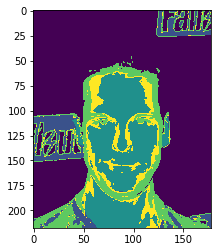

In [7]:
#Show the clusters
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(labels, interpolation='nearest')
plt.show()

In [8]:
#Obtain the face attribute locations
leyex=data.iloc[ino,1]
leyey=data.iloc[ino,2]
reyex=data.iloc[ino,3]
reyey=data.iloc[ino,4]
nosex=data.iloc[ino,5]
nosey=data.iloc[ino,6]
lmx=data.iloc[ino,7]
lmy=data.iloc[ino,8]
rmx=data.iloc[ino,9]
rmy=data.iloc[ino,10]

In [9]:
#Pool all the labes corresponding to the face attribute positions. Save the segments with rescpect to those labels to final
final=np.zeros_like(img)
for l in range(0,3):
    for i in range(0,218):
        for j in range(0,178):
         if labels[i,j]==labels[leyex,leyey]:
            final[i,j,l]=img[i,j,l]
         elif labels[i,j]==labels[reyex,reyey]:
            final[i,j,l]=img[i,j,l]
         elif labels[i,j]==labels[nosex,nosey]:
            final[i,j,l]=img[i,j,l]
         elif labels[i,j]==labels[lmx,lmy]:
            final[i,j,l]=img[i,j,l]
         elif labels[i,j]==labels[rmx,rmy]:
            final[i,j,l]=img[i,j,l]
            

In [10]:
#Display the foreground image
cv2.imshow("final",final)
cv2.waitKey()

-1